In [1]:
import pandas as pd

### Data Collection

In [2]:
datac = pd.read_csv(r"C:\Users\Nithya\Downloads\archive (5)\training.1600000.processed.noemoticon.csv", encoding="latin-1",header=None)

### Data Exploration

In [3]:
data = datac.copy()

In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.columns=["sentiment_label", "user_id", "time_stamp", "flag", "user_name", "tweet_content"]

In [6]:
data

,sentiment_label,user_id,time_stamp,flag,user_name,tweet_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   sentiment_label  1600000 non-null  int64 
 1   user_id          1600000 non-null  int64 
 2   time_stamp       1600000 non-null  object
 3   flag             1600000 non-null  object
 4   user_name        1600000 non-null  object
 5   tweet_content    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Data Cleaning

In [8]:
data.isnull().sum()

sentiment_label    0
user_id            0
time_stamp         0
flag               0
user_name          0
tweet_content      0
dtype: int64

In [9]:
data.duplicated().sum()

0

The dataset doesn't have any null values or duplicate values. The data is clean with correct number of data entries and datatypes

### EDA

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

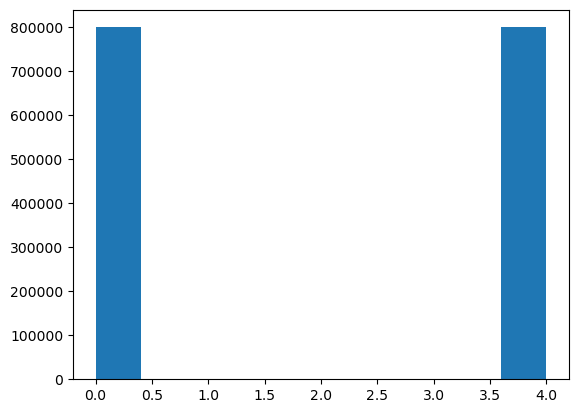

In [11]:
plt.hist(data["sentiment_label"])
plt.show()

The above histogram depicts that the dataset has two classes with equal number of datapoints in each

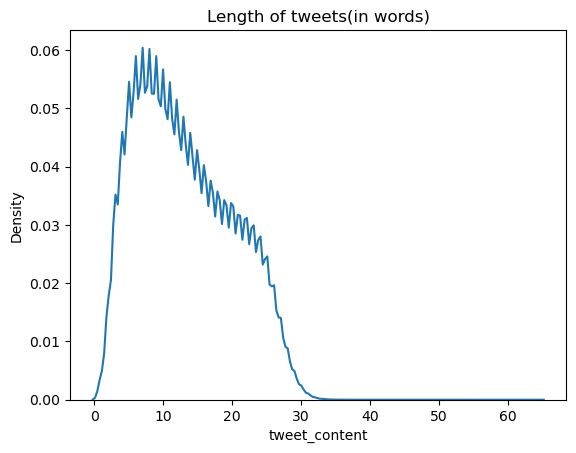

In [12]:
sns.kdeplot(data["tweet_content"].apply(lambda x:len(x.split())))
plt.title("Length of tweets(in words)")
plt.show()

From the above kde plot we can say that the length of most of the tweets is between 10-20 words.

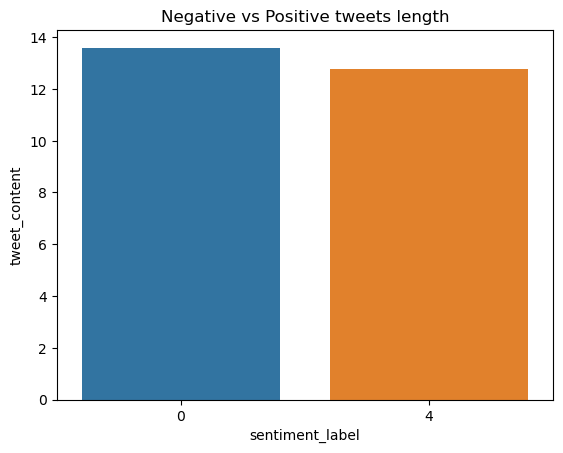

In [13]:
sns.barplot(data = data, x=data["sentiment_label"], y=data["tweet_content"].apply(lambda x:len(x.split())))
plt.title("Negative vs Positive tweets length")
plt.show()

The bar graph depicts that negative tweets are more lengthy compared to positive tweets.

In [14]:
data["time_stamp"].value_counts().head(25)

Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 14:13:07 PDT 2009    16
Fri Jun 05 11:05:33 PDT 2009    16
Mon Jun 01 12:25:21 PDT 2009    15
Fri May 22 08:34:27 PDT 2009    15
Mon Jun 15 10:39:32 PDT 2009    15
Mon Jun 01 15:19:07 PDT 2009    15
Sat Jun 06 11:59:49 PDT 2009    15
Fri Jun 05 09:45:09 PDT 2009    15
Fri May 29 10:09:34 PDT 2009    15
Fri Jun 05 14:17:04 PDT 2009    15
Sat May 30 07:53:15 PDT 2009    15
Fri May 29 12:15:42 PDT 2009    14
Fri May 29 21:11:33 PDT 2009    14
Wed Jun 03 06:52:51 PDT 2009    14
Mon Jun 15 06:53:22 PDT 2009    14
Fri Jun 05 13:30:33 PDT 2009    14
Sat Jun 06 15:22:24 PDT 2009    14
Mon Jun 01 11:08:39 PDT 2009    14
Fri May 29 19:30:48 PDT 2009    14
Sat May 30 14:49:31 PDT 2009    14
Fri Jun 05 15:47:53 PDT 2009    14
Name: time_stamp, dtype: int64

these are the timestamps during which more number of users are active.

### Split the dataset

In [10]:
fv = data.iloc[:,-1]
cv = data.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=3,stratify=cv)

### Data Preprocessing

In [15]:
import regex as re
from textblob import TextBlob
import emoji

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
def preprocess_text(series):
    # Ensure input is a pandas Series object
    if not isinstance(series, pd.Series):
        raise ValueError("Input must be a pandas Series object.")
    
    # Convert non-string values to strings
    series = series.astype(str)
    
    # Convert to lowercase
    series = series.str.lower()
    
    # Remove HTML tags
    series = series.apply(lambda x: re.sub(r'<[^>]*>', '', x))
    
    # Remove URLs
    series = series.apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))
    
    # Remove punctuation
    series = series.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    series = series.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
    
    # Remove float values
    series = series.apply(lambda x: re.sub(r'\b\d+\.\d+\b', '', x))
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    series = series.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
    
    return series

In [19]:
pp_x_train=preprocess_text(x_train)

### EDA

In [20]:
df=pd.DataFrame({"x_train":pp_x_train, "y_train":y_train})

In [21]:
gp = df.groupby("y_train")

In [22]:
from collections import Counter

In [23]:
Counter("".join(gp.get_group(4)["x_train"]).split()).most_common(10)

[('im', 51160),
 ('good', 37818),
 ('day', 31209),
 ('love', 29799),
 ('get', 28518),
 ('like', 26928),
 ('u', 26561),
 ('thanks', 20966),
 ('go', 20809),
 ('time', 19614)]

Top ten most common words in positive tweets.

In [25]:
Counter("".join(gp.get_group(0)["x_train"]).split()).most_common(10)

[('im', 67585),
 ('get', 35879),
 ('go', 33247),
 ('dont', 30921),
 ('like', 30444),
 ('day', 29719),
 ('cant', 27833),
 ('work', 24917),
 ('got', 23688),
 ('going', 21225)]

Top ten most common words in negative tweets.

In [26]:
from wordcloud import WordCloud

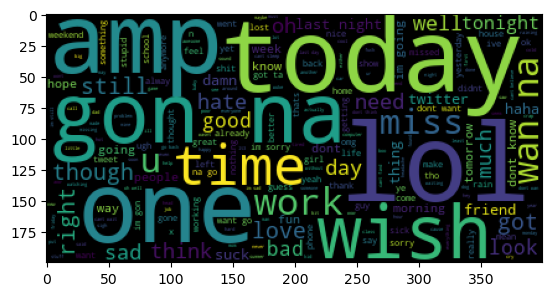

In [29]:
wc=WordCloud().generate(" ".join(gp.get_group(0)["x_train"]))
plt.imshow(wc)
plt.show()

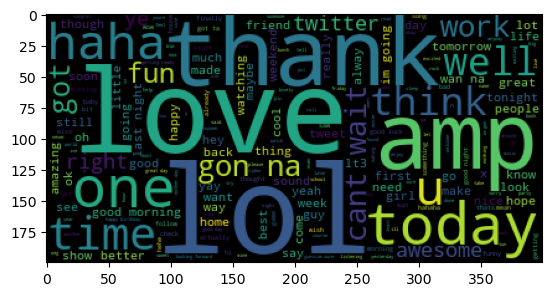

In [30]:
wc=WordCloud().generate(" ".join(gp.get_group(4)["x_train"]))
plt.imshow(wc)
plt.show()

### Feature Engineering

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_on_pptext=Pipeline([("Pre-process",FunctionTransformer(preprocess_text)),("bagofwords",CountVectorizer())])

In [33]:
bow_on_pptext

Pipeline(steps=[('Pre-process',
                 FunctionTransformer(func=<function preprocess_text at 0x0000029D24AAC1F0>)),
                ('bagofwords', CountVectorizer())])

In [34]:
bow_on_pptext.fit_transform(x_train)

<1280000x665208 sparse matrix of type '<class 'numpy.int64'>'
	with 9588851 stored elements in Compressed Sparse Row format>

### Bernoulli Naive Bayes

In [25]:
from sklearn.naive_bayes import BernoulliNB

In [26]:
b=BernoulliNB(alpha=1.0)

In [27]:
final_model=b.fit(bow_on_pptext.fit_transform(x_train),y_train)

### Accuracy of the model


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
predict=final_model.predict(bow_on_pptext.transform(x_test))

In [30]:
accuracy_score(y_test,predict)

0.78453125

### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [32]:
cm = confusion_matrix(y_test, predict)
cm

array([[128283,  31717],
       [ 37233, 122767]], dtype=int64)

In [33]:
ConfusionMatrixDisplay(cm)

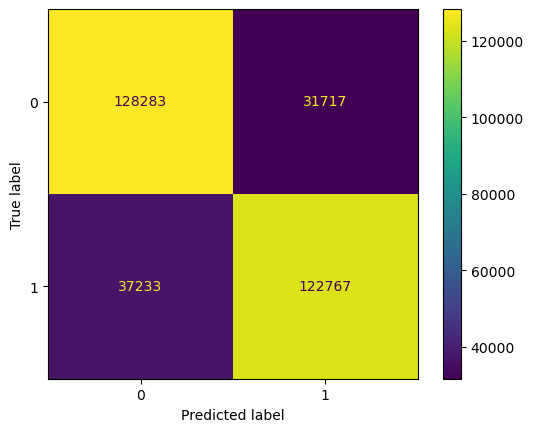

In [36]:
i=ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

### Classification Report

In [37]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79    160000
           4       0.79      0.77      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



### Deployment

In [38]:
import pickle

In [39]:
pickle.dump(final_model,open(r"C:\Users\Nithya\Videos\sentimentanalysis.pkl","wb"))

In [41]:
pickle.dump(bow_on_pptext,open(r"C:\Users\Nithya\Videos\bow_on_pptext.pkl","wb"))